In [2]:
#Data manipulation and preprocessing 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
#Data exploration
from sklearn.feature_selection import chi2
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
#Data balancing
from imblearn.over_sampling import SMOTE
#Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from catboost import CatBoostClassifier

#Model Evaluation
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,accuracy_score,roc_curve
import warnings
warnings.filterwarnings("ignore")

### Data preprocessing

In [3]:
data = pd.read_csv("urinalysis_tests.csv")#importing the dataset
data.head()

,Unnamed: 0,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,1-3,0-2,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE
1,1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,1-3,0-2,RARE,FEW,FEW,MODERATE,NEGATIVE
2,2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,0-3,0-2,RARE,FEW,MODERATE,RARE,NEGATIVE
3,3,77.0,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,5-8,LOADED,RARE,RARE,NONE SEEN,FEW,NEGATIVE
4,4,29.0,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,1-4,0-2,RARE,RARE,NONE SEEN,FEW,NEGATIVE


In [4]:
data.drop(columns = "Unnamed: 0", axis = 1,inplace = True)#removing the unnamed column
data.head()

,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,1-3,0-2,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE
1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,1-3,0-2,RARE,FEW,FEW,MODERATE,NEGATIVE
2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,0-3,0-2,RARE,FEW,MODERATE,RARE,NEGATIVE
3,77.0,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,5-8,LOADED,RARE,RARE,NONE SEEN,FEW,NEGATIVE
4,29.0,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,1-4,0-2,RARE,RARE,NONE SEEN,FEW,NEGATIVE


In [5]:
data.shape

(1436, 15)

In [6]:
for col in data.columns: #categorical data and what each label encoded represents
    print(list(data[col].unique()))
    print(col)

[76.0, 9.0, 12.0, 77.0, 29.0, 50.0, 3.0, 23.0, 8.0, 2.0, 65.0, 62.0, 18.0, 31.0, 44.0, 32.0, 26.0, 1.0, 30.0, 41.0, 0.1, 84.0, 83.0, 27.0, 37.0, 5.0, 47.0, 21.0, 36.0, 24.0, 80.0, 4.0, 67.0, 35.0, 42.0, 71.0, 61.0, 70.0, 22.0, 40.0, 51.0, 48.0, 49.0, 72.0, 0.06, 59.0, 15.0, 54.0, 13.0, 74.0, 14.0, 0.05, 52.0, 19.0, 58.0, 17.0, 60.0, 7.0, 68.0, 66.0, 39.0, 6.0, 53.0, 28.0, 10.0, 64.0, 56.0, 63.0, 0.09, 25.0, 38.0, 46.0, 0.04, 34.0, 20.0, 78.0, 43.0, 11.0, 0.03, 45.0, 33.0, 69.0, 16.0, 0.07, 82.0, 57.0, 0.02, 0.11, 75.0, 0.01, 73.0, 55.0, 85.0, 79.0, 87.0, 92.0, 0.08, 89.0, 86.0]
Age
['FEMALE', 'MALE']
Gender
['LIGHT YELLOW', 'DARK YELLOW', 'BROWN', 'YELLOW', 'AMBER', 'STRAW', 'RED', 'REDDISH', 'REDDISH YELLOW', 'LIGHT RED', nan]
Color
['CLEAR', 'SLIGHTLY HAZY', 'CLOUDY', 'HAZY', 'TURBID']
Transparency
['NEGATIVE', '3+', '1+', 'TRACE', '4+', '2+']
Glucose
['NEGATIVE', '1+', 'TRACE', '2+', '3+']
Protein
[5.0, 6.0, 7.0, 7.5, 6.5, 8.0]
pH
[1.01, 1.03, 1.02, 1.025, 1.005, 1.015]
Specific Gra

In [7]:
data.columns

Index(['Age', 'Gender', 'Color', 'Transparency', 'Glucose', 'Protein', 'pH',
       'Specific Gravity', 'WBC', 'RBC', 'Epithelial Cells', 'Mucous Threads',
       'Amorphous Urates', 'Bacteria', 'Diagnosis'],
      dtype='object')

In [8]:
data.shape #size of the dataset

(1436, 15)

### Data Exploration

In [9]:
data['Diagnosis'].value_counts() #values in the diagnosis

Diagnosis
NEGATIVE    1355
POSITIVE      81
Name: count, dtype: int64

Text(0.5, 1.0, 'Negative versus positive diagnosis')

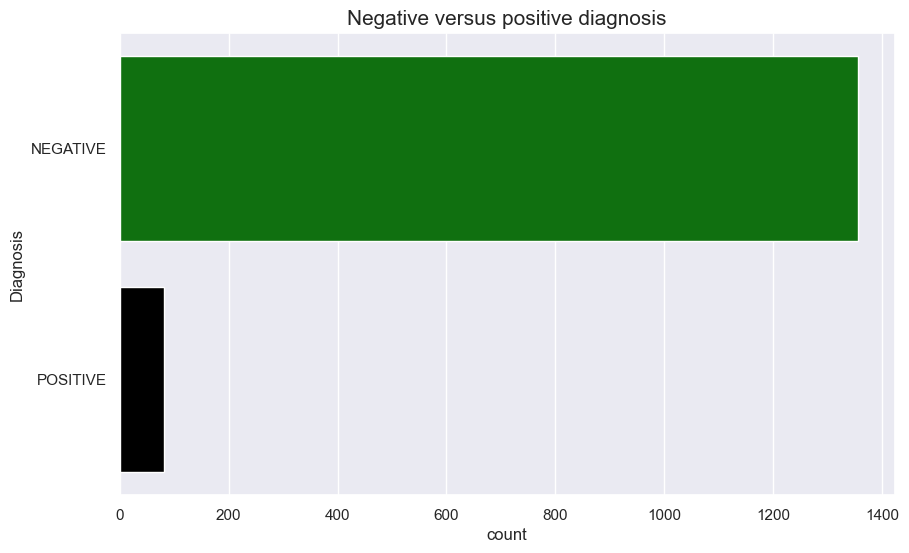

In [10]:
#Negative and positive diagnosis
plt.figure(figsize = (10,6))
sns.countplot(data['Diagnosis'], palette=['green', 'black'])
plt.title('Negative versus positive diagnosis',fontdict = {'size':15})

Text(0.5, 1.0, 'Percentage of female UTI patients among the female population')

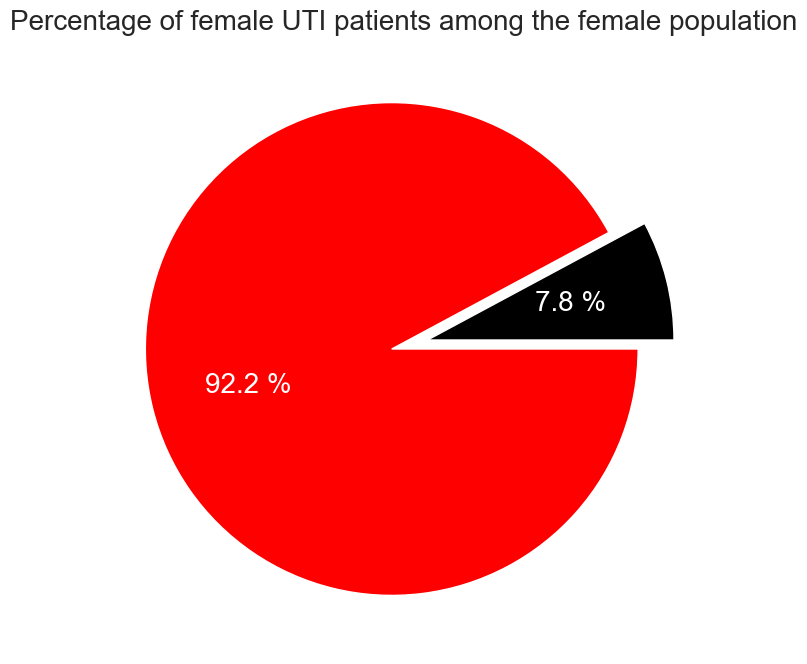

In [11]:
positive_diag = data[data['Diagnosis']=="POSITIVE"] #positive diagnosis subset
#percentage of female uti patients among the female population
perc_fem = len(positive_diag[positive_diag["Gender"]=='FEMALE'])/len(data[data["Gender"]=='FEMALE'])
plt.figure(figsize = (8,8)) #size of the pie chart
plt.pie([perc_fem,1-perc_fem],
        explode =[0.1,0.05],
        colors = ['black','red'],
       autopct = "%2.1f %%",
        textprops={"color":"white",
                   "size" : 20}
       )#pie plot showing results
plt.title("Percentage of female UTI patients among the female population",
         fontdict = {"size":20}) #title of the chart and its size

## Data Preprocessing

In [12]:
#Missing data analysis
data.isnull().sum()

Age                 0
Gender              0
Color               1
Transparency        0
Glucose             0
Protein             0
pH                  0
Specific Gravity    0
WBC                 0
RBC                 0
Epithelial Cells    0
Mucous Threads      0
Amorphous Urates    0
Bacteria            0
Diagnosis           0
dtype: int64

In [13]:
#Drop missing data rows
data.dropna(inplace = True)
data.isnull().sum()

Age                 0
Gender              0
Color               0
Transparency        0
Glucose             0
Protein             0
pH                  0
Specific Gravity    0
WBC                 0
RBC                 0
Epithelial Cells    0
Mucous Threads      0
Amorphous Urates    0
Bacteria            0
Diagnosis           0
dtype: int64

In [14]:
data.head()

,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,1-3,0-2,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE
1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,1-3,0-2,RARE,FEW,FEW,MODERATE,NEGATIVE
2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,0-3,0-2,RARE,FEW,MODERATE,RARE,NEGATIVE
3,77.0,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,5-8,LOADED,RARE,RARE,NONE SEEN,FEW,NEGATIVE
4,29.0,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,1-4,0-2,RARE,RARE,NONE SEEN,FEW,NEGATIVE


In [15]:
data.columns

Index(['Age', 'Gender', 'Color', 'Transparency', 'Glucose', 'Protein', 'pH',
       'Specific Gravity', 'WBC', 'RBC', 'Epithelial Cells', 'Mucous Threads',
       'Amorphous Urates', 'Bacteria', 'Diagnosis'],
      dtype='object')

In [16]:
data['Diagnosis'].replace({'NEGATIVE':0,'POSITIVE':1},inplace = True)

In [17]:
df_encoded = pd.get_dummies(data, columns=['Gender', 'Color', 'Transparency', 'Glucose', 'Protein', 'pH',
       'Specific Gravity', 'WBC', 'RBC', 'Epithelial Cells', 'Mucous Threads',
       'Amorphous Urates', 'Bacteria'])

In [18]:
df_encoded['Diagnosis']=data['Diagnosis']
df_encoded.head()

,Age,Diagnosis,Gender_FEMALE,Gender_MALE,Color_AMBER,Color_BROWN,Color_DARK YELLOW,Color_LIGHT RED,Color_LIGHT YELLOW,Color_RED,...,Amorphous Urates_NONE SEEN,Amorphous Urates_OCCASIONAL,Amorphous Urates_PLENTY,Amorphous Urates_RARE,Bacteria_FEW,Bacteria_LOADED,Bacteria_MODERATE,Bacteria_OCCASIONAL,Bacteria_PLENTY,Bacteria_RARE
0,76.0,0,True,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
1,9.0,0,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,12.0,0,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,77.0,0,False,True,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
4,29.0,0,True,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [19]:
#Feature selection and data splitting
#x = pd.concat([cat_data,data['Age']],axis = 1)
x=df_encoded.drop(['Diagnosis'],axis = 1)
y = df_encoded['Diagnosis']
len(x)

1435

In [20]:
x.head()

,Age,Gender_FEMALE,Gender_MALE,Color_AMBER,Color_BROWN,Color_DARK YELLOW,Color_LIGHT RED,Color_LIGHT YELLOW,Color_RED,Color_REDDISH,...,Amorphous Urates_NONE SEEN,Amorphous Urates_OCCASIONAL,Amorphous Urates_PLENTY,Amorphous Urates_RARE,Bacteria_FEW,Bacteria_LOADED,Bacteria_MODERATE,Bacteria_OCCASIONAL,Bacteria_PLENTY,Bacteria_RARE
0,76.0,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
1,9.0,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,12.0,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,77.0,False,True,False,True,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
4,29.0,True,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


### Data splitting

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 40)
print(len(x_train))
print(len(x_test))

1148
287


### Training the imbalanced data

In [22]:
class TrainImbModels:
    def __init__(self,model,x_train, y_train, x_test, y_test):
        self.model = model
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.predictions = None
    def imb_model(self):#function for training imbalanced models
        self.model.fit(self.x_train,self.y_train)
        self.predictions = self.model.predict(x_test)
        return print(classification_report(self.y_test,self.predictions))
    def plot_roc(self,model_name):
        plt.plot(roc_curve(self.y_test,self.predictions))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {model_name}')
    def plot_cm(self,model_name): #function for plotting confusiom matrix
        cm = confusion_matrix(self.y_test,self.predictions)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
        disp.plot()
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()

In [23]:
k_nn = TrainImbModels(KNeighborsClassifier(),x_train, y_train, x_test, y_test) #KNN
k_nn.imb_model()

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       278
           1       0.00      0.00      0.00         9

    accuracy                           0.97       287
   macro avg       0.48      0.50      0.49       287
weighted avg       0.94      0.97      0.95       287



In [24]:
x.columns

Index(['Age', 'Gender_FEMALE', 'Gender_MALE', 'Color_AMBER', 'Color_BROWN',
       'Color_DARK YELLOW', 'Color_LIGHT RED', 'Color_LIGHT YELLOW',
       'Color_RED', 'Color_REDDISH',
       ...
       'Amorphous Urates_NONE SEEN', 'Amorphous Urates_OCCASIONAL',
       'Amorphous Urates_PLENTY', 'Amorphous Urates_RARE', 'Bacteria_FEW',
       'Bacteria_LOADED', 'Bacteria_MODERATE', 'Bacteria_OCCASIONAL',
       'Bacteria_PLENTY', 'Bacteria_RARE'],
      dtype='object', length=194)

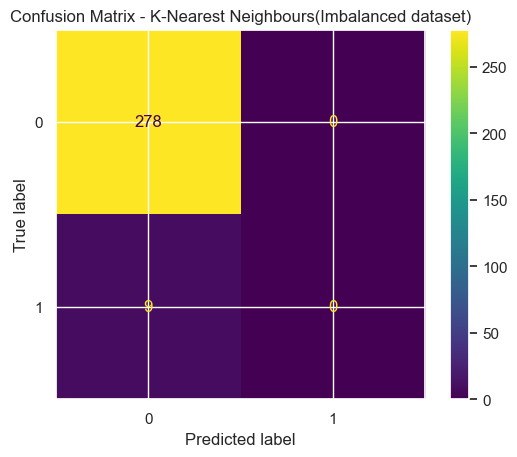

In [25]:
k_nn.plot_cm("K-Nearest Neighbours(Imbalanced dataset)")

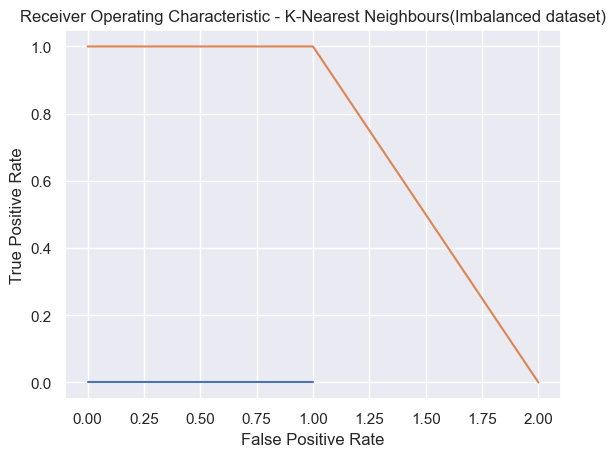

In [26]:
k_nn.plot_roc("K-Nearest Neighbours(Imbalanced dataset)")

In [27]:
rand_for = TrainImbModels(RandomForestClassifier(),x_train, y_train, x_test, y_test)#Random forest
rand_for.imb_model()

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       278
           1       0.00      0.00      0.00         9

    accuracy                           0.97       287
   macro avg       0.48      0.50      0.49       287
weighted avg       0.94      0.97      0.95       287



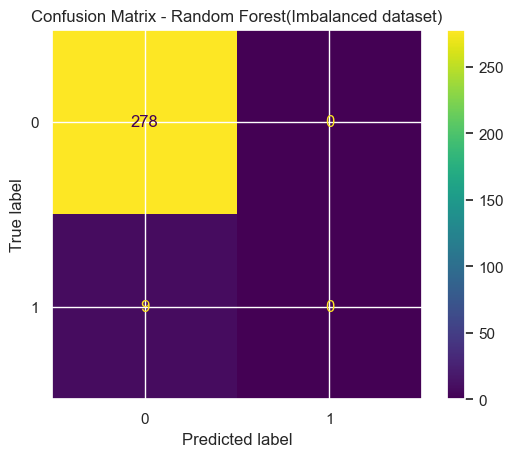

In [28]:
rand_for.plot_cm("Random Forest(Imbalanced dataset)")

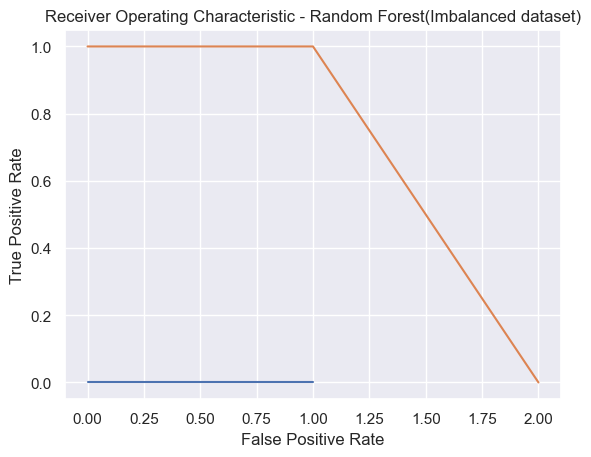

In [29]:
rand_for.plot_roc("Random Forest(Imbalanced dataset)")

In [30]:
log_reg = TrainImbModels(LogisticRegression(),x_train, y_train, x_test, y_test) #Logistic Regression
log_reg.imb_model()

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       278
           1       0.67      0.22      0.33         9

    accuracy                           0.97       287
   macro avg       0.82      0.61      0.66       287
weighted avg       0.97      0.97      0.97       287



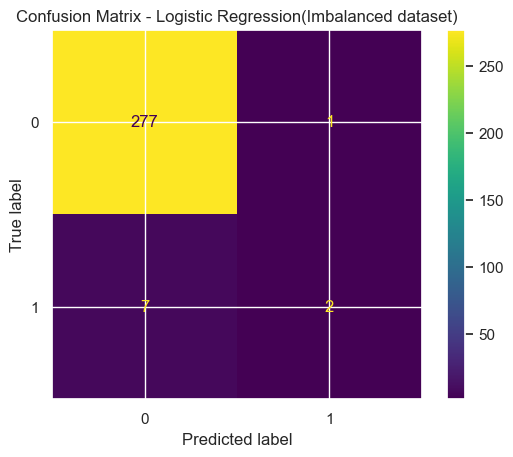

In [31]:
log_reg.plot_cm("Logistic Regression(Imbalanced dataset)")

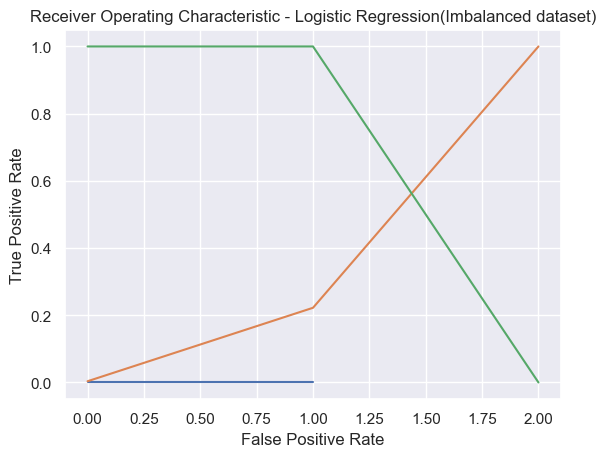

In [32]:
log_reg.plot_roc("Logistic Regression(Imbalanced dataset)")

In [33]:
ada = TrainImbModels(AdaBoostClassifier(),x_train, y_train, x_test, y_test) #Adaptive boosting
ada.imb_model()

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       278
           1       0.40      0.22      0.29         9

    accuracy                           0.97       287
   macro avg       0.69      0.61      0.63       287
weighted avg       0.96      0.97      0.96       287



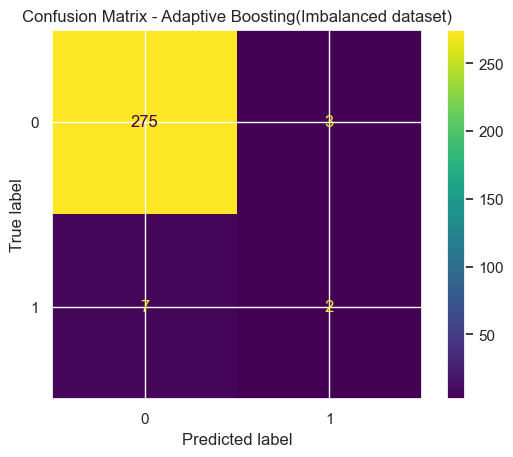

In [34]:
ada.plot_cm("Adaptive Boosting(Imbalanced dataset)")

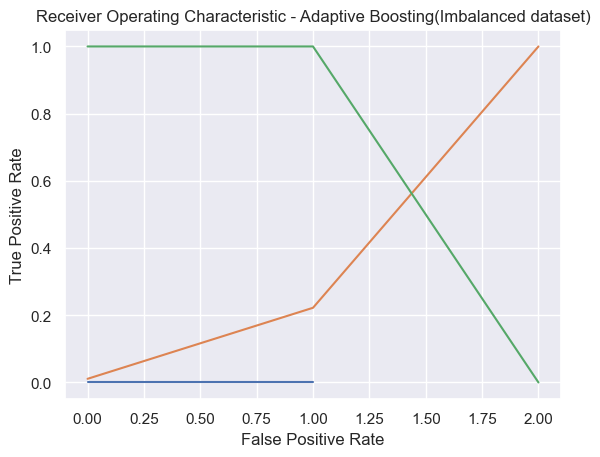

In [35]:
ada.plot_roc("Adaptive Boosting(Imbalanced dataset)")

In [36]:
DT = TrainImbModels(DecisionTreeClassifier(),x_train, y_train, x_test, y_test) #Decision Tree
DT.imb_model()

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       278
           1       0.27      0.33      0.30         9

    accuracy                           0.95       287
   macro avg       0.63      0.65      0.64       287
weighted avg       0.96      0.95      0.95       287



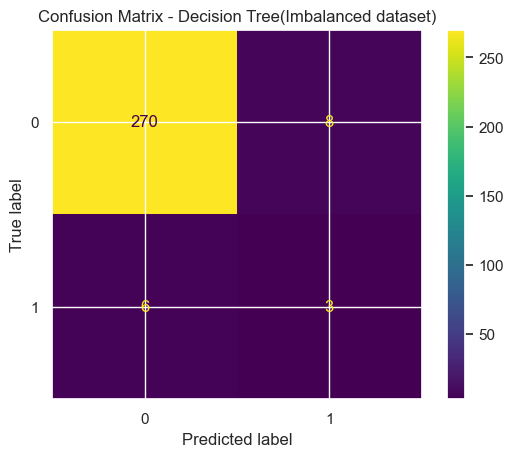

In [37]:
DT.plot_cm("Decision Tree(Imbalanced dataset)")

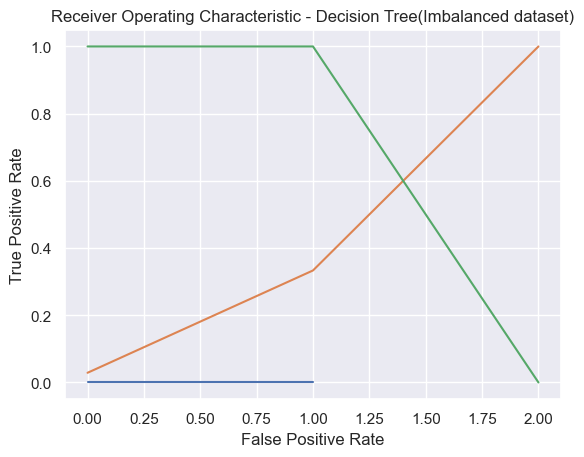

In [38]:
DT.plot_roc("Decision Tree(Imbalanced dataset)")

In [39]:
naive_bayes = TrainImbModels(BernoulliNB(),x_train, y_train, x_test, y_test)
naive_bayes.imb_model()

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       278
           1       0.21      0.44      0.29         9

    accuracy                           0.93       287
   macro avg       0.60      0.70      0.62       287
weighted avg       0.96      0.93      0.94       287



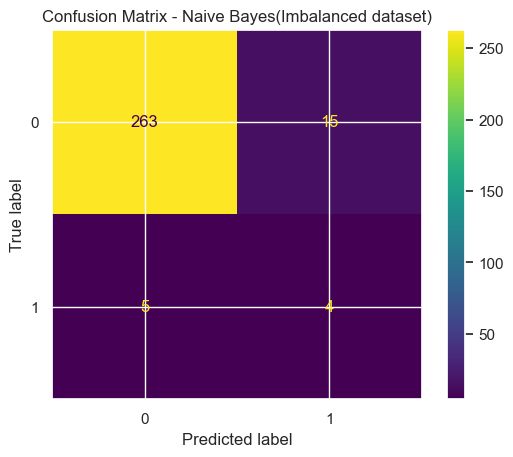

In [40]:
naive_bayes.plot_cm("Naive Bayes(Imbalanced dataset)")

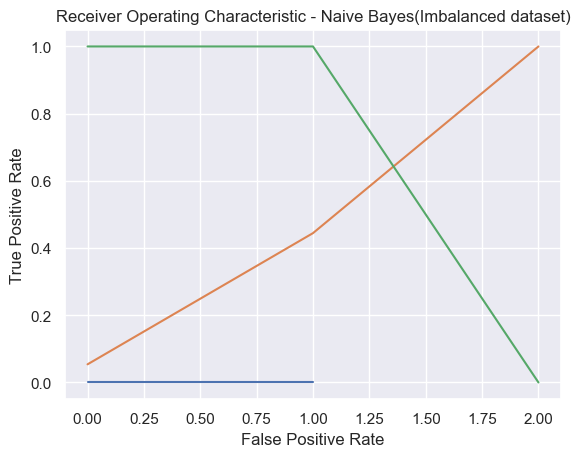

In [41]:
naive_bayes.plot_roc("Naive Bayes(Imbalanced dataset)")

In [42]:
svm = TrainImbModels(SVC(kernel = 'sigmoid'),x_train, y_train, x_test, y_test)
svm.imb_model()

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       278
           1       0.00      0.00      0.00         9

    accuracy                           0.97       287
   macro avg       0.48      0.50      0.49       287
weighted avg       0.94      0.97      0.95       287



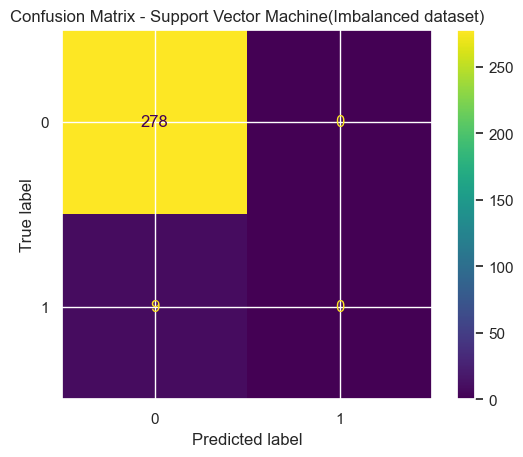

In [43]:
svm.plot_cm("Support Vector Machine(Imbalanced dataset)")

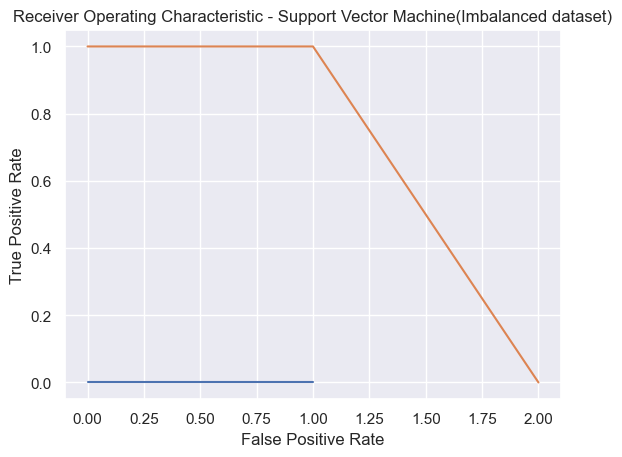

In [44]:
svm.plot_roc("Support Vector Machine(Imbalanced dataset)")

In [45]:
x.columns[1]

'Gender_FEMALE'

In [46]:
cat_features = list(x.columns[1:]) #selecting the categorical variables in the dataset
cat = CatBoostClassifier(iterations=500, 
                           depth=6, 
                           learning_rate=0.1, 
                           loss_function='Logloss', 
                           verbose=True)
# Training the model
cat.fit(x_train, y_train, cat_features=cat_features, eval_set=(x_test, y_test), plot=True)

# Making predictions
cat_pred = cat.predict(x_test)
print(classification_report(y_test,cat_pred))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5713842	test: 0.5671273	best: 0.5671273 (0)	total: 151ms	remaining: 1m 15s
1:	learn: 0.4703074	test: 0.4585974	best: 0.4585974 (1)	total: 166ms	remaining: 41.3s
2:	learn: 0.4090927	test: 0.3918869	best: 0.3918869 (2)	total: 182ms	remaining: 30.1s
3:	learn: 0.3421236	test: 0.3233436	best: 0.3233436 (3)	total: 197ms	remaining: 24.4s
4:	learn: 0.3054121	test: 0.2845609	best: 0.2845609 (4)	total: 212ms	remaining: 21s
5:	learn: 0.2664411	test: 0.2458420	best: 0.2458420 (5)	total: 228ms	remaining: 18.8s
6:	learn: 0.2490392	test: 0.2272209	best: 0.2272209 (6)	total: 244ms	remaining: 17.2s
7:	learn: 0.2275693	test: 0.2039074	best: 0.2039074 (7)	total: 260ms	remaining: 16s
8:	learn: 0.2131377	test: 0.1878427	best: 0.1878427 (8)	total: 276ms	remaining: 15.1s
9:	learn: 0.2027973	test: 0.1768739	best: 0.1768739 (9)	total: 292ms	remaining: 14.3s
10:	learn: 0.1948345	test: 0.1701061	best: 0.1701061 (10)	total: 308ms	remaining: 13.7s
11:	learn: 0.1874970	test: 0.1634285	best: 0.1634285 (1

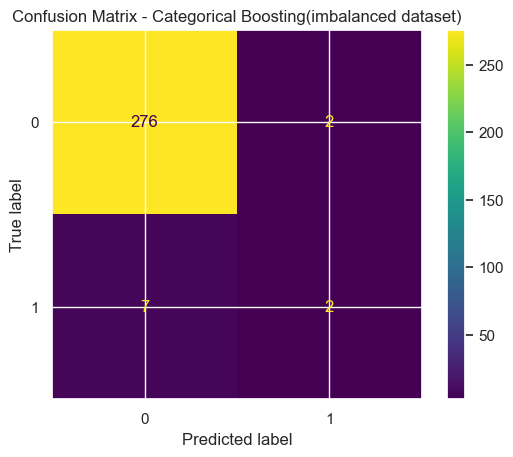

In [47]:
cm = confusion_matrix(y_test,cat_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.title('Confusion Matrix - Categorical Boosting(imbalanced dataset)')
plt.show()

### Data balancing

In [48]:
smote = SMOTE()
x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)

### Training the model with the balanced dataset

In [49]:
knn_bal = TrainImbModels(KNeighborsClassifier(),x_train_bal, y_train_bal, x_test, y_test) #KNN
knn_bal.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       278
           1       0.00      0.00      0.00         9

    accuracy                           0.95       287
   macro avg       0.48      0.49      0.49       287
weighted avg       0.94      0.95      0.95       287



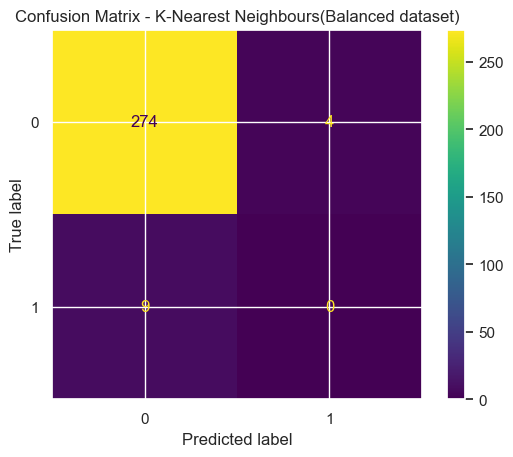

In [50]:
knn_bal.plot_cm("K-Nearest Neighbours(Balanced dataset)")

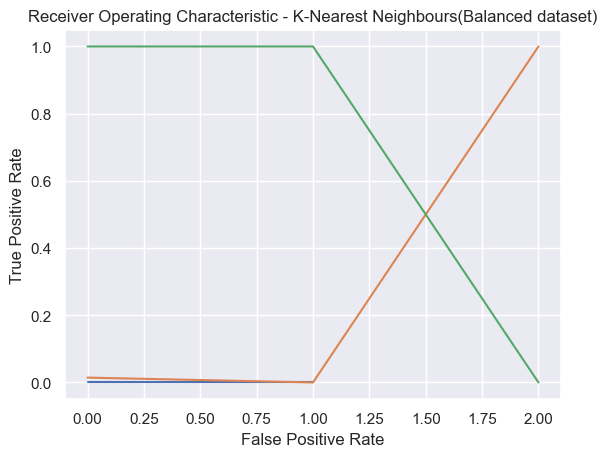

In [51]:
knn_bal.plot_roc("K-Nearest Neighbours(Balanced dataset)")

In [52]:
rand_for_bal = TrainImbModels(RandomForestClassifier(),x_train_bal, y_train_bal, x_test, y_test) #Random forest
rand_for_bal.imb_model()

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       278
           1       0.00      0.00      0.00         9

    accuracy                           0.97       287
   macro avg       0.48      0.50      0.49       287
weighted avg       0.94      0.97      0.95       287



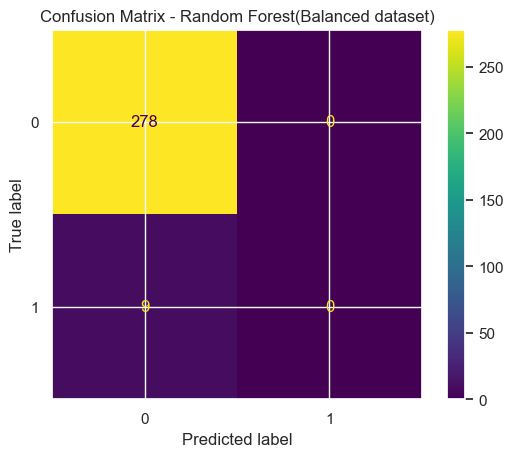

In [53]:
rand_for_bal.plot_cm("Random Forest(Balanced dataset)")

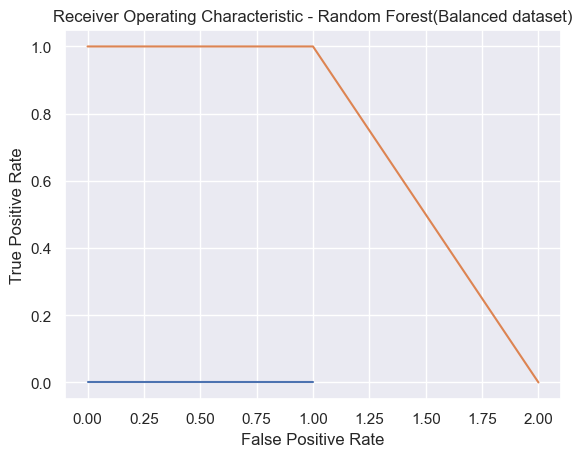

In [54]:
rand_for_bal.plot_roc("Random Forest(Balanced dataset)")

In [55]:
log_reg_bal = TrainImbModels(LogisticRegression(),x_train_bal, y_train_bal, x_test, y_test) #Logistic Regression
log_reg_bal.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       278
           1       0.29      0.22      0.25         9

    accuracy                           0.96       287
   macro avg       0.63      0.60      0.61       287
weighted avg       0.95      0.96      0.96       287



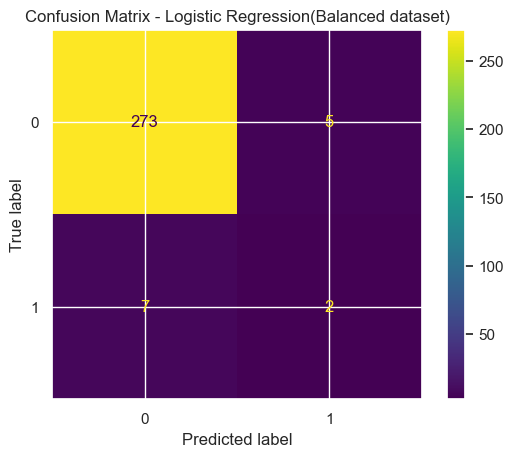

In [56]:
log_reg_bal.plot_cm("Logistic Regression(Balanced dataset)")

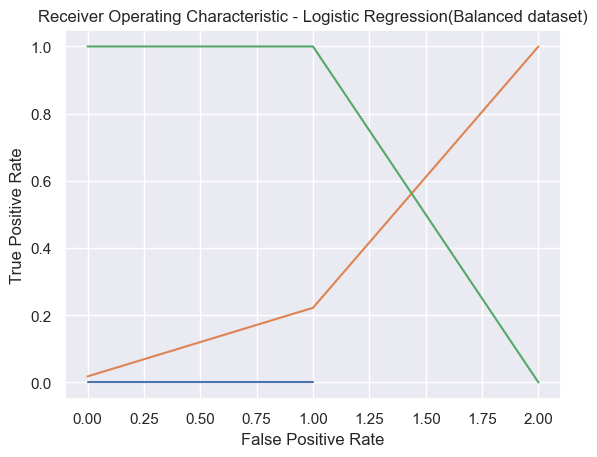

In [57]:
log_reg_bal.plot_roc("Logistic Regression(Balanced dataset)")

In [58]:
ada_bal = TrainImbModels(AdaBoostClassifier(),x_train_bal, y_train_bal, x_test, y_test) #Adaptive boosting
ada_bal.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       278
           1       0.10      0.11      0.11         9

    accuracy                           0.94       287
   macro avg       0.54      0.54      0.54       287
weighted avg       0.94      0.94      0.94       287



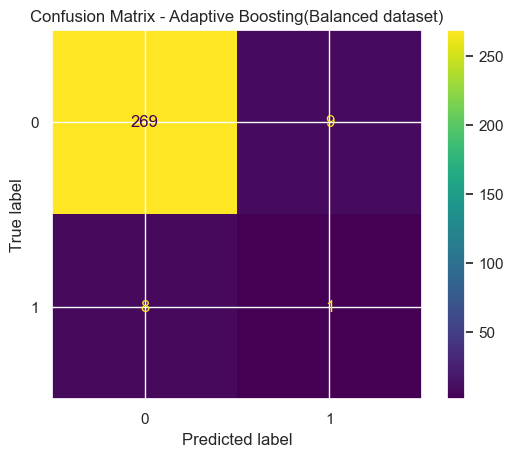

In [59]:
ada_bal.plot_cm("Adaptive Boosting(Balanced dataset)")

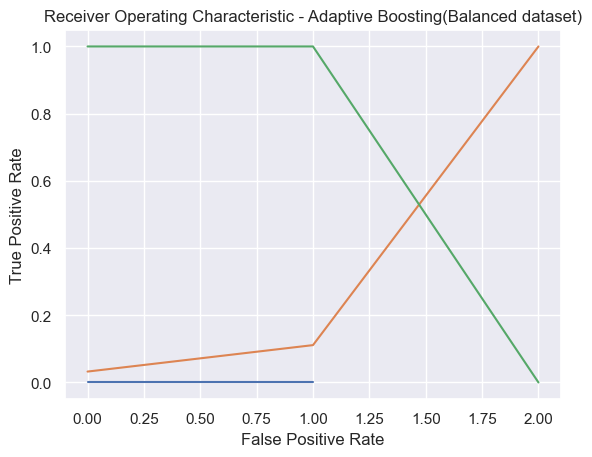

In [60]:
ada_bal.plot_roc("Adaptive Boosting(Balanced dataset)")

In [61]:
DT_bal = TrainImbModels(DecisionTreeClassifier(),x_train_bal, y_train_bal, x_test, y_test) #Decision tree
DT_bal.imb_model()

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       278
           1       0.11      0.22      0.15         9

    accuracy                           0.92       287
   macro avg       0.54      0.58      0.55       287
weighted avg       0.95      0.92      0.93       287



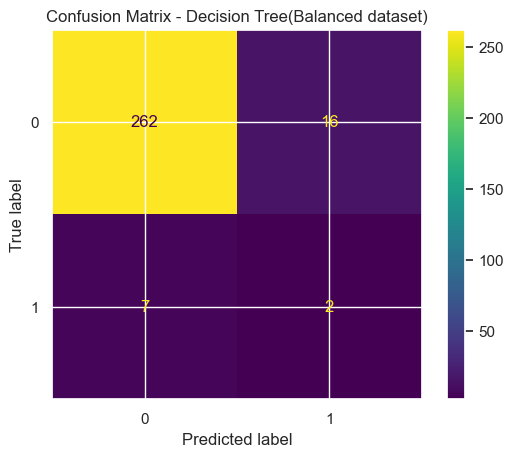

In [62]:
DT_bal.plot_cm("Decision Tree(Balanced dataset)")

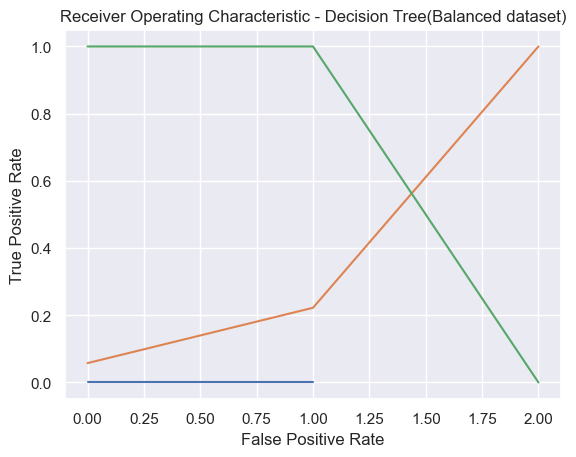

In [63]:
DT_bal.plot_roc("Decision Tree(Balanced dataset)")

In [64]:
naive_bayes_bal = TrainImbModels(BernoulliNB(),x_train_bal, y_train_bal, x_test, y_test) #Naive bayes
naive_bayes_bal.imb_model()

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       278
           1       0.17      0.44      0.25         9

    accuracy                           0.92       287
   macro avg       0.58      0.69      0.60       287
weighted avg       0.96      0.92      0.93       287



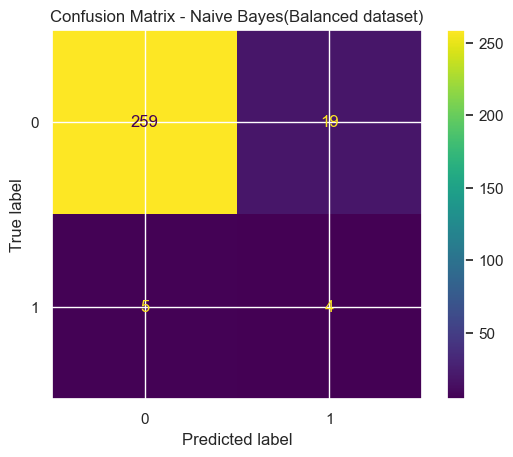

In [65]:
naive_bayes_bal.plot_cm("Naive Bayes(Balanced dataset)")

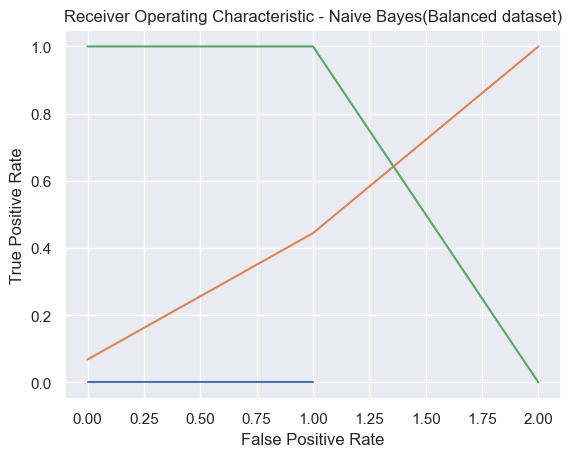

In [66]:
naive_bayes_bal.plot_roc("Naive Bayes(Balanced dataset)")

In [67]:
svm_bal = TrainImbModels(SVC(kernel = 'sigmoid'),x_train_bal, y_train_bal, x_test, y_test) #Support vector machine
svm_bal.imb_model()

              precision    recall  f1-score   support

           0       0.96      0.56      0.71       278
           1       0.02      0.33      0.04         9

    accuracy                           0.55       287
   macro avg       0.49      0.45      0.38       287
weighted avg       0.93      0.55      0.69       287



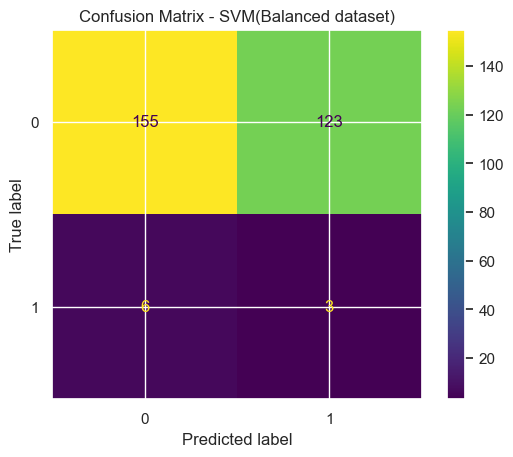

In [68]:
svm_bal.plot_cm("SVM(Balanced dataset)")

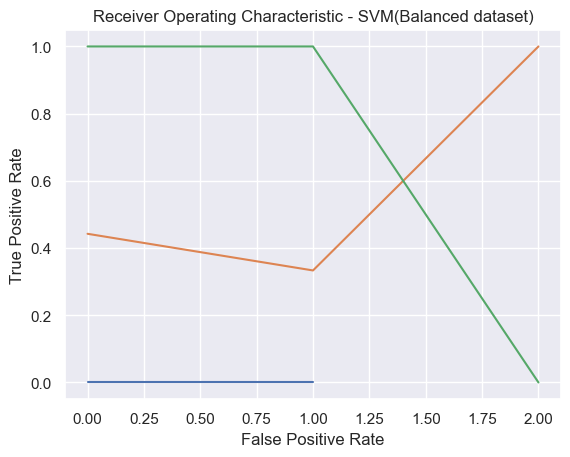

In [69]:
svm_bal.plot_roc("SVM(Balanced dataset)")

In [70]:
x.columns[1:]

Index(['Gender_FEMALE', 'Gender_MALE', 'Color_AMBER', 'Color_BROWN',
       'Color_DARK YELLOW', 'Color_LIGHT RED', 'Color_LIGHT YELLOW',
       'Color_RED', 'Color_REDDISH', 'Color_REDDISH YELLOW',
       ...
       'Amorphous Urates_NONE SEEN', 'Amorphous Urates_OCCASIONAL',
       'Amorphous Urates_PLENTY', 'Amorphous Urates_RARE', 'Bacteria_FEW',
       'Bacteria_LOADED', 'Bacteria_MODERATE', 'Bacteria_OCCASIONAL',
       'Bacteria_PLENTY', 'Bacteria_RARE'],
      dtype='object', length=193)

In [71]:
cat_features = list(x.columns[1:]) #selecting the categorical variables in the dataset
cat_bal = CatBoostClassifier(iterations=500, 
                           depth=6, 
                           learning_rate=0.1, 
                           loss_function='Logloss', 
                           verbose=True)
# Training the model
cat_bal.fit(x_train_bal, y_train_bal, cat_features=cat_features, eval_set=(x_test, y_test), plot=True)
# Making predictions
cat_bal_pred = cat_bal.predict(x_test)
print(classification_report(y_test,cat_bal_pred))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5998255	test: 0.6095129	best: 0.6095129 (0)	total: 23.3ms	remaining: 11.6s
1:	learn: 0.5040896	test: 0.5201683	best: 0.5201683 (1)	total: 47.8ms	remaining: 11.9s
2:	learn: 0.4517710	test: 0.4785085	best: 0.4785085 (2)	total: 69.6ms	remaining: 11.5s
3:	learn: 0.3852201	test: 0.4222931	best: 0.4222931 (3)	total: 94.9ms	remaining: 11.8s
4:	learn: 0.3387492	test: 0.3809819	best: 0.3809819 (4)	total: 119ms	remaining: 11.8s
5:	learn: 0.3055224	test: 0.3506203	best: 0.3506203 (5)	total: 142ms	remaining: 11.7s
6:	learn: 0.2767512	test: 0.3273009	best: 0.3273009 (6)	total: 164ms	remaining: 11.6s
7:	learn: 0.2590311	test: 0.3168118	best: 0.3168118 (7)	total: 187ms	remaining: 11.5s
8:	learn: 0.2407884	test: 0.3037195	best: 0.3037195 (8)	total: 212ms	remaining: 11.6s
9:	learn: 0.2194999	test: 0.2861273	best: 0.2861273 (9)	total: 239ms	remaining: 11.7s
10:	learn: 0.2065614	test: 0.2748332	best: 0.2748332 (10)	total: 268ms	remaining: 11.9s
11:	learn: 0.1951660	test: 0.2621021	best: 0.262

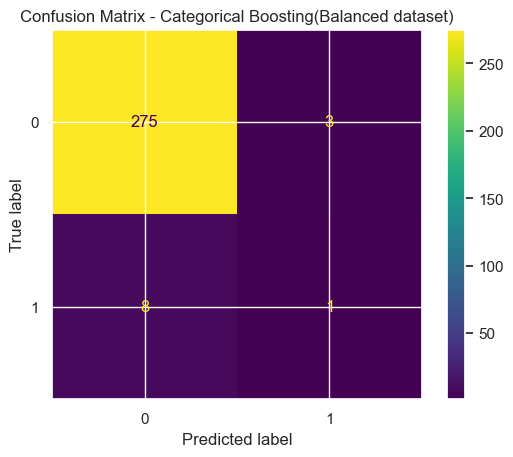

In [72]:
cm = confusion_matrix(y_test,cat_bal_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.title('Confusion Matrix - Categorical Boosting(Balanced dataset)')
plt.show()

Text(0.5, 1.0, 'Receiver Operating Characteristic - Catboost(Balanced dataset)')

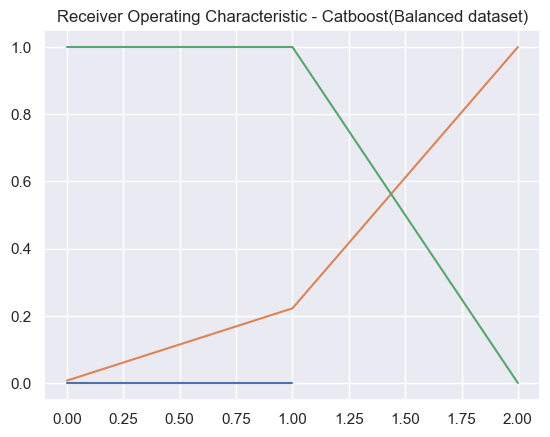

In [73]:
plt.plot(roc_curve(y_test,cat_bal_pred))
plt.title('Receiver Operating Characteristic - Catboost(Balanced dataset)')

In [74]:
cat_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)